osilating means learning rate can be reduced
to small learning rate will see that the rate of learning will be very slow (also in little improvement between each epoch)

# CAB320_Assignment_2

Basic Classification task

1) Break up data into training and test sets (validation will be taken from the training data at model fit() time)
    - there is a way to create a dataset from a directory 
    - https://keras.io/api/data_loading/image/#image_dataset_from_directory-function 
    - dont forget to look for a .seed of the image_dataset_from_directory function so it doesnt get the same data for training and testingand      splits it properly

2) Get the "MobileNetV2" model from keras

3) Get a pretrained model and modify for our problem (snip off the end layer and just add 5 neurons for our 5 classes)
    - https://keras.io/guides/transfer_learning/

4) Compile and train model on specific parameters

5) Plot the training and validation errors over time

6) Exeriment with 3 different orders of magnitude for learning (10, 1, 0.1)

7) Use the best learning rate to create the final model

6) Create a report

In [17]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from time import process_time


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorboard import notebook
from tensorflow.keras.preprocessing.image import Iterator

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

import cv2
print(keras.__version__)
print(tf.__version__)

2.9.0
2.9.1


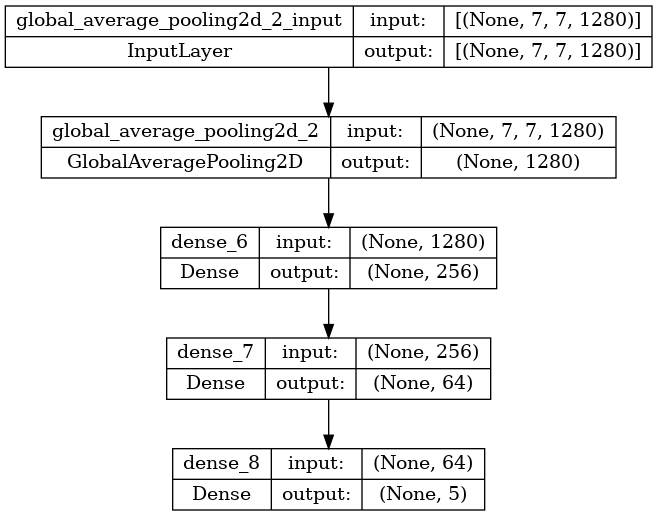

In [18]:
model_end = tf.keras.Sequential([
        # layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (7, 7, 1280)),
        layers.GlobalAveragePooling2D(input_shape = (7, 7, 1280)),
        layers.Dense(256, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(5, activation='softmax')
        ])

keras.utils.plot_model(model_end, show_shapes=True)

## **HELPER FUNCTION**

In [19]:
def eval_model(model, x_train, y_train, x_test, y_test):


    fig = plt.figure(figsize=[30, 10])
    ax = fig.add_subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    ax.legend()
    ax.set_title('Training Performance')

    
    ax = fig.add_subplot(1, 3, 2)
    pred = model.predict(x_train);
    indexes = tf.argmax(pred, axis=1)
    cm = confusion_matrix(y_train, indexes)
    c = ConfusionMatrixDisplay(cm, display_labels=class_names)
    c.plot(ax = ax)    
    ax.set_title('Training')
    
    ax = fig.add_subplot(1, 3, 3)
    
    pred = model.predict(x_test);

    indexes = tf.argmax(pred, axis=1)
    cm = confusion_matrix(y_test, indexes)
    c = ConfusionMatrixDisplay(cm, display_labels=class_names)
    c.plot(ax = ax)    
    ax.set_title('Testing')
    print(classification_report(y_test, indexes))

In [20]:
seed = 52

In [21]:
data = keras.utils.image_dataset_from_directory(
    "Data",
    labels="inferred",
    color_mode="rgb",
    batch_size=None,
    shuffle=True,
    seed=seed,
    # validation_split=0.1,
    # subset="training"
)

Found 1000 files belonging to 5 classes.


In [22]:
# validation = keras.utils.image_dataset_from_directory(
#     "Data",
#     labels="inferred",
#     color_mode="rgb",
#     batch_size=None,
#     shuffle=True,
#     seed=seed,
#     validation_split=0.1,
#     subset="validation"
# )

In [23]:
print(len(data))

1000


In [24]:
print(data.class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


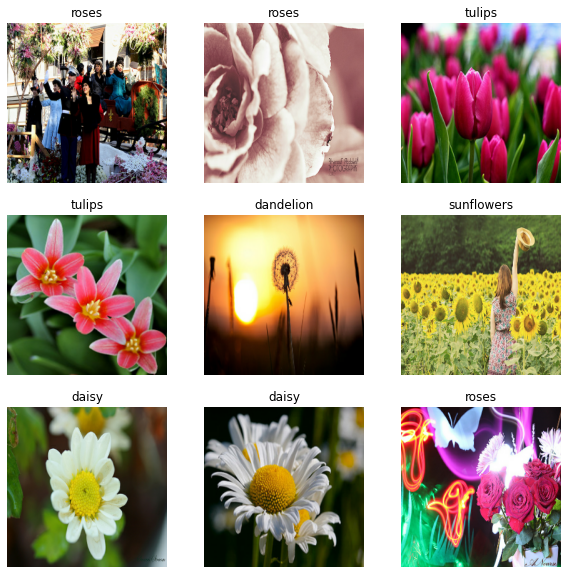

In [25]:
plt.figure(figsize=(10, 10))
class_names = data.class_names
i = 0
for image, label in data.take(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(class_names[label])
    plt.axis("off")
    i = i+1

Extract training and testing sets

In [26]:
combined_ext_img = []
combined_ext_label = []
for image, label in data:
  combined_ext_img.append(image)
  combined_ext_label.append(label)

In [27]:
print(len(combined_ext_img))
print(len(combined_ext_label))

1000
1000


In [28]:
numpy_ext_img = np.array(combined_ext_img)
numpy_ext_label = np.array(combined_ext_label)

In [29]:
print(numpy_ext_img.shape)
print(numpy_ext_label.shape)

(1000, 256, 256, 3)
(1000,)


In [30]:
print(numpy_ext_img.shape)
numpy_ext_img_reshape = tf.image.resize(numpy_ext_img, (224,224)).numpy()
print(numpy_ext_img_reshape.shape)


(1000, 256, 256, 3)


2022-05-28 23:44:17.738892: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 786432000 exceeds 10% of free system memory.


(1000, 224, 224, 3)


In [31]:
image_size = (224, 224, 3)

Train Test Splits

In [32]:
#useful for making the perfect test split size of 100
perfect_test_split = 0.15
#train_X, test_X, train_Y, test_Y = train_test_split(numpy_ext_img_reshape, numpy_ext_label, test_size=perfect_test_split, random_state=42)
train_X, test_X, train_Y, test_Y = train_test_split(numpy_ext_img_reshape, numpy_ext_label, test_size=perfect_test_split, random_state=42)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
perfect_test_split = 0.176
train_X, validation_X, train_Y, validation_Y = train_test_split(train_X, train_Y, test_size=perfect_test_split, random_state=42)
print(train_X.shape)
print(train_Y.shape)
print(validation_X.shape)
print(validation_Y.shape)

(850, 224, 224, 3)
(850,)
(150, 224, 224, 3)
(150,)
(700, 224, 224, 3)
(700,)
(150, 224, 224, 3)
(150,)


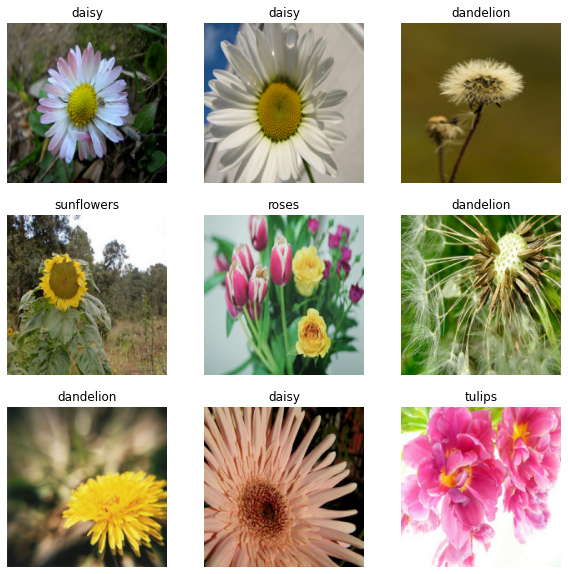

In [33]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_X[i].astype("uint8"))
    plt.title(class_names[train_Y[i]])
    plt.axis("off")

In [17]:
print(train_X.shape)
print(validation_X.shape)
print(test_X.shape)

(700, 224, 224, 3)
(150, 224, 224, 3)
(150, 224, 224, 3)


Class seperation split

Training Class daisy - 145
Training Class dandelion - 137
Training Class roses - 138
Training Class sunflowers - 134
Training Class tulips - 146

Validation Class daisy - 32
Validation Class dandelion - 34
Validation Class roses - 26
Validation Class sunflowers - 31
Validation Class tulips - 27

Testing Class daisy - 23
Testing Class dandelion - 29
Testing Class roses - 36
Testing Class sunflowers - 35
Testing Class tulips - 27

daisy Class - 200
dandelion Class - 200
roses Class - 200
sunflowers Class - 200
tulips Class - 200


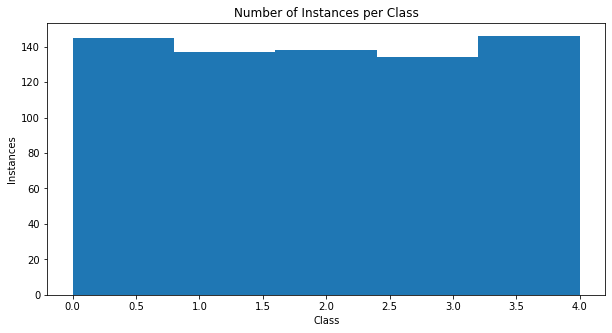

In [18]:
fig = plt.figure(figsize=[10, 5])    
ax = fig.add_subplot(1, 1, 1)
ax.hist(train_Y.flatten(), 5)
ax.set_xlabel('Class')
ax.set_ylabel('Instances')
ax.set_title('Number of Instances per Class');

for x in range(5):
    print("Training Class " + str(class_names[x]) + " - " + str((train_Y == x).sum()))
print("")
for x in range(5):
    print("Validation Class " + str(class_names[x]) + " - " + str((validation_Y == x).sum()))
print("")
for x in range(5):
    print("Testing Class " + str(class_names[x]) + " - " + str((test_Y == x).sum()))
print("")
for x in range(5):
    sumOf = 0
    sumOf = sumOf + (train_Y == x).sum()
    sumOf = sumOf + (validation_Y == x).sum()
    sumOf = sumOf + (test_Y == x).sum()
    print(str(class_names[x]) + " Class - " + str(sumOf))

# **Default Model**

In [19]:
model1 = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights=None,
    input_shape=(256,256,3),
    include_top = False 
)
w1 = model1.get_weights()

In [20]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights="imagenet",
    input_shape=image_size,
    include_top = False 
)

w2 = model.get_weights()

In [21]:
print(w1[0][0][0][0])

[-0.00201552  0.0486944   0.06614211  0.07149087 -0.02731566  0.04368581
 -0.03834867  0.00849381 -0.03878582  0.10055701  0.01227343 -0.13727759
 -0.13169691  0.06411353 -0.08370809 -0.11708313  0.07859099  0.04109702
  0.01845875  0.0823715  -0.06763666 -0.00036636 -0.10218525 -0.01086625
  0.04622386  0.12765725 -0.08157882 -0.05976686 -0.05302468  0.02039978
 -0.08682041  0.11171806]


In [22]:
print(w2[0][0][0][0])

[-1.71659231e-01 -3.33731920e-01  5.30122258e-02 -5.93232973e-21
  2.08742931e-01 -1.20433941e-01  1.75700430e-02 -3.10708203e-22
 -9.62498877e-03  1.90229788e-01 -3.67278278e-01  3.95997976e-22
 -2.36236629e-22  3.36706383e-22  8.83555040e-02 -7.75416642e-02
  3.95842289e-05 -3.63377742e-02  5.99925742e-02  5.53736472e-21
 -4.68022423e-04 -1.23387486e-01 -1.34351701e-01  8.75968020e-03
 -2.47503355e-01  1.58492010e-02 -2.43145856e-04 -1.09811597e-01
  5.55126644e-22 -2.03368161e-03  2.83311605e-01  7.66634047e-02]


In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

### **Basic MobileNetV2**

In [24]:
#outputs = layers.Dense(5, activation='softmax')(model.layers[-2].output)
outputs = layers.GlobalAveragePooling2D()(model.layers[-1].output)
outputs = layers.Dense(256, activation='relu')(outputs)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(5, activation='softmax')(outputs)
model_basic = keras.Model(inputs=model.input, outputs=outputs)
model_basic.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

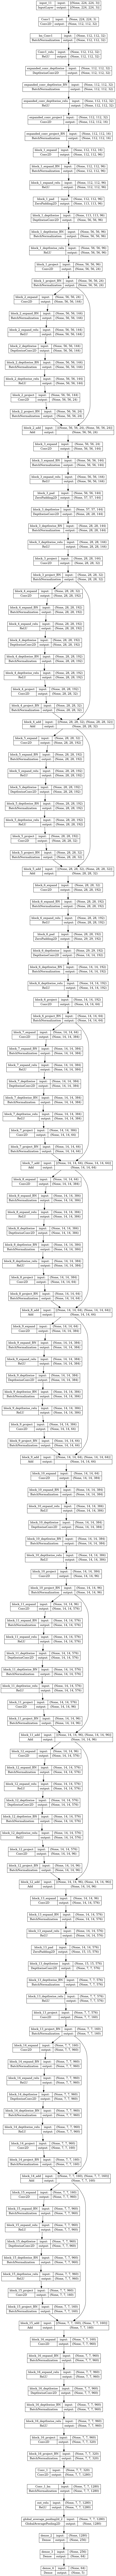

In [81]:
keras.utils.plot_model(model_basic, show_shapes=True)

In [25]:
for layer in model_basic.layers[:-7]:
    layer.trainable = False

for layer in model_basic.layers:
    print(layer.name, layer.trainable)

input_2 False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_depthwi

In [ ]:
model_basic.summary()

In [92]:
model_basic.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.SGD(
                  learning_rate=0.01, momentum=0.0, nesterov=False
              ),
              metrics=['accuracy'])

history = model_basic.fit(train_X, train_Y,
                        batch_size=32,
                        epochs=30,
                        validation_data=(validation_X, validation_Y))

Epoch 1/30
22/22 [==============================] - 76s 3s/step - loss: 1.5840 - accuracy: 0.2943 - val_loss: 1.7253 - val_accuracy: 0.1867
Epoch 2/30
22/22 [==============================] - 36s 892ms/step - loss: 1.3183 - accuracy: 0.5000 - val_loss: 1.5679 - val_accuracy: 0.2733
Epoch 3/30
22/22 [==============================] - 18s 846ms/step - loss: 1.1442 - accuracy: 0.6171 - val_loss: 1.5447 - val_accuracy: 0.3200
Epoch 4/30
22/22 [==============================] - 20s 921ms/step - loss: 1.0107 - accuracy: 0.6700 - val_loss: 1.4495 - val_accuracy: 0.4000
Epoch 5/30
22/22 [==============================] - 13s 600ms/step - loss: 0.8813 - accuracy: 0.7357 - val_loss: 1.4645 - val_accuracy: 0.3733
Epoch 6/30
22/22 [==============================] - 18s 834ms/step - loss: 0.7890 - accuracy: 0.7629 - val_loss: 1.4289 - val_accuracy: 0.3867
Epoch 7/30
22/22 [==============================] - 14s 666ms/step - loss: 0.6728 - accuracy: 0.8143 - val_loss: 1.3874 - val_accuracy: 0.4200
Ep

In [23]:
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


5/5 [==============================] - 1s 283ms/step
              precision    recall  f1-score   support

           0       0.53      0.29      0.38        31
           1       0.44      0.54      0.48        26
           2       0.78      0.50      0.61        28
           3       0.47      0.79      0.59        29
           4       0.65      0.61      0.63        36

    accuracy                           0.55       150
   macro avg       0.57      0.55      0.54       150
weighted avg       0.58      0.55      0.54       150



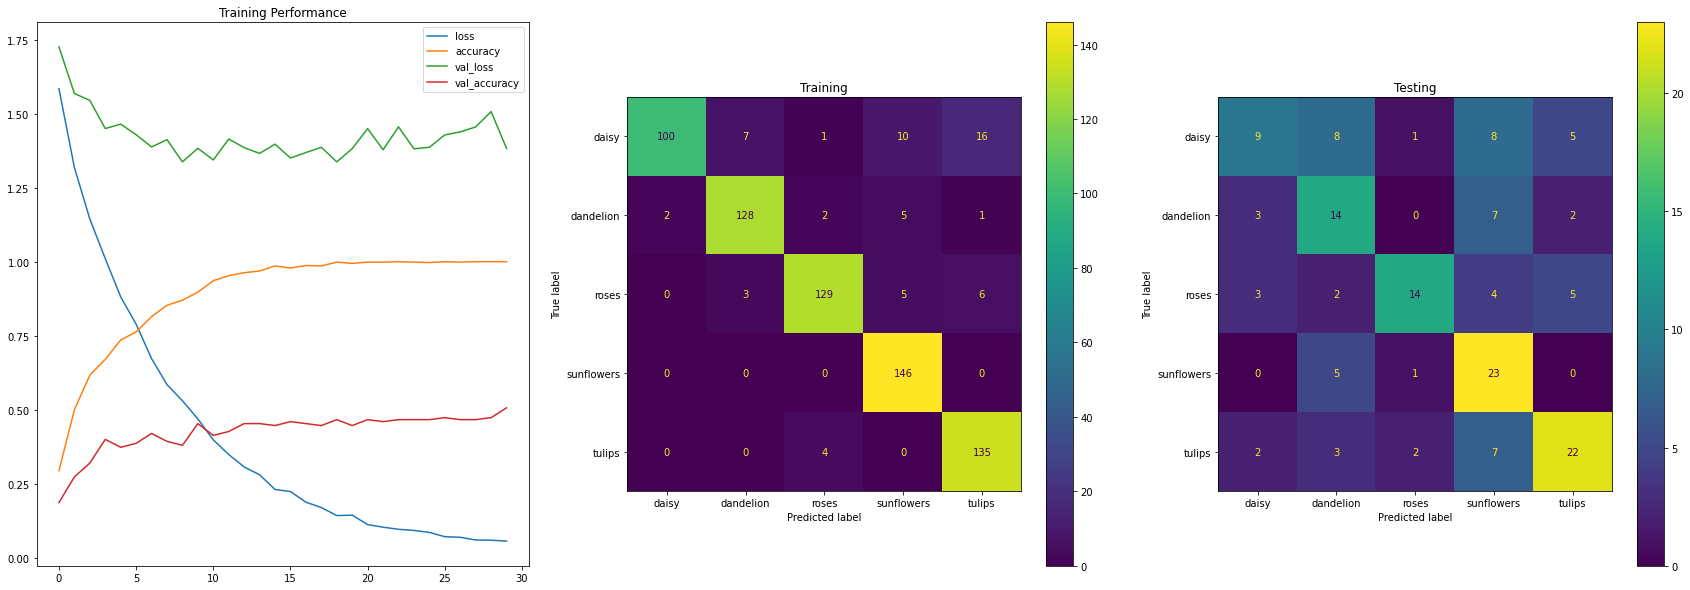

In [93]:
eval_model(model_basic, train_X, train_Y, test_X, test_Y)

# **Learning Rate Tests**

Epoch 1/30
22/22 [==============================] - 13s 512ms/step - loss: 1.7353 - accuracy: 0.2986 - val_loss: 1.5722 - val_accuracy: 0.2667
Epoch 2/30
22/22 [==============================] - 25s 1s/step - loss: 0.8313 - accuracy: 0.7443 - val_loss: 1.7756 - val_accuracy: 0.2667
Epoch 3/30
22/22 [==============================] - 11s 495ms/step - loss: 0.4610 - accuracy: 0.8914 - val_loss: 1.5705 - val_accuracy: 0.3267
Epoch 4/30
22/22 [==============================] - 15s 679ms/step - loss: 0.2859 - accuracy: 0.9586 - val_loss: 1.6115 - val_accuracy: 0.3333
Epoch 5/30
22/22 [==============================] - 12s 569ms/step - loss: 0.1751 - accuracy: 0.9929 - val_loss: 1.6202 - val_accuracy: 0.3333
Epoch 6/30
22/22 [==============================] - 13s 593ms/step - loss: 0.1215 - accuracy: 1.0000 - val_loss: 1.5541 - val_accuracy: 0.3533
Epoch 7/30
22/22 [==============================] - 11s 512ms/step - loss: 0.0886 - accuracy: 1.0000 - val_loss: 1.5344 - val_accuracy: 0.3867
Ep

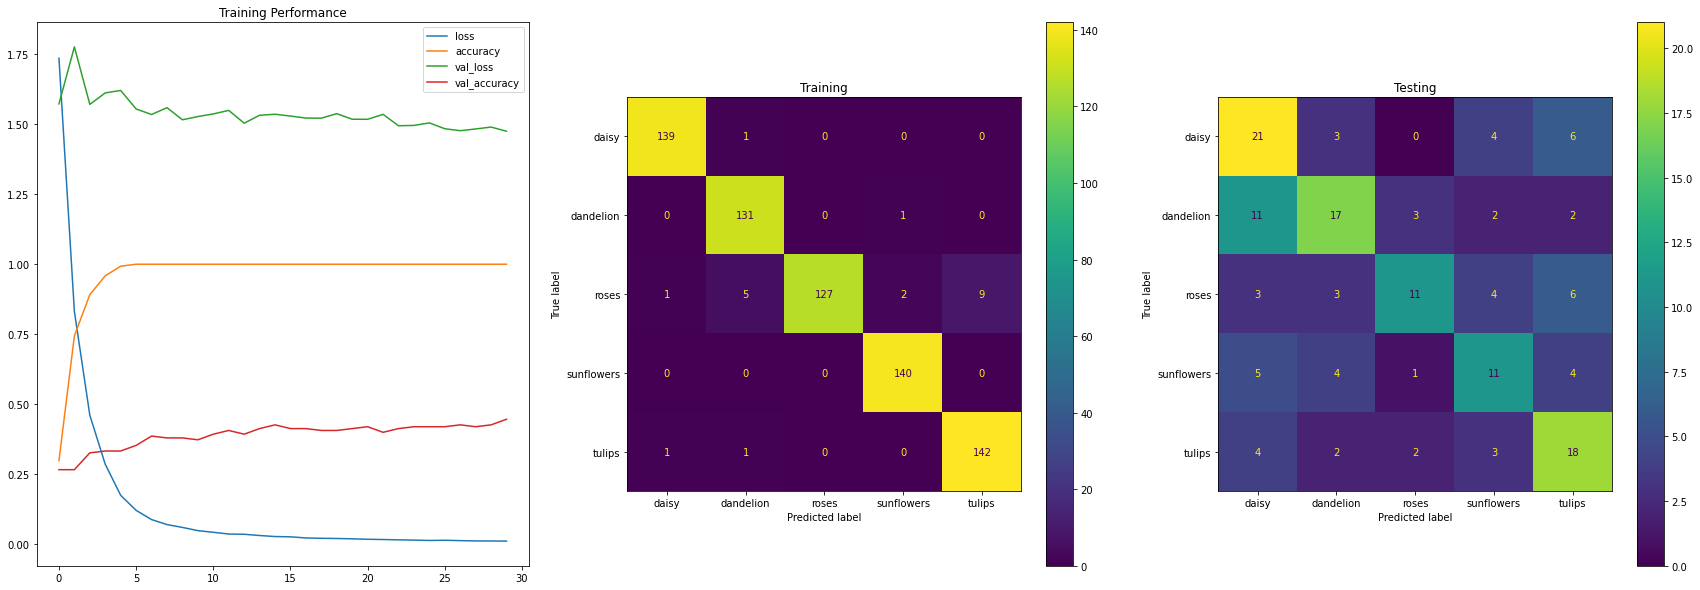

In [56]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights="imagenet",
    input_shape=image_size,
    include_top = False 
)

outputs = layers.GlobalAveragePooling2D()(model.layers[-1].output)
outputs = layers.Dense(256, activation='relu')(outputs)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(5, activation='softmax')(outputs)

model_0001 = keras.Model(inputs=model.input, outputs=outputs)

for layer in model_0001.layers[:-6]:
    layer.trainable = False

model_0001.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.SGD(
                  learning_rate=0.001, momentum=0.0, nesterov=False
              ),
              metrics=['accuracy'])

history = model_0001.fit(train_X, train_Y,
                        batch_size=32,
                        epochs=30,
                        validation_data=(validation_X, validation_Y))

eval_model(model_0001, train_X, train_Y, test_X, test_Y)

In [58]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights="imagenet",
    input_shape=image_size,
    include_top = False 
)

outputs = layers.GlobalAveragePooling2D()(model.layers[-1].output)
outputs = layers.Dense(256, activation='relu')(outputs)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(5, activation='softmax')(outputs)

model_01 = keras.Model(inputs=model.input, outputs=outputs)

model_01.summary()

for layer in model_01.layers[:-6]:
    layer.trainable = False

for layer in model_01.layers:
    print(layer.name, layer.trainable)    

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [57]:
#Model
model_01.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.SGD(
                  learning_rate=0.1, momentum=0.0, nesterov=False
              ),
              metrics=['accuracy'])

history = model_01.fit(train_X, train_Y,
                        batch_size=32,
                        epochs=30,
                        validation_data=(validation_X, validation_Y))
eval_model(model_01, train_X, train_Y, test_X, test_Y)

Epoch 1/30
22/22 [==============================] - 13s 495ms/step - loss: 21.4003 - accuracy: 0.1929 - val_loss: 1.6104 - val_accuracy: 0.1733
Epoch 2/30
22/22 [==============================] - 10s 457ms/step - loss: 1.7846 - accuracy: 0.2100 - val_loss: 1.6084 - val_accuracy: 0.2333
Epoch 3/30
22/22 [==============================] - 10s 470ms/step - loss: 1.6151 - accuracy: 0.1986 - val_loss: 1.6098 - val_accuracy: 0.1800
Epoch 4/30
22/22 [==============================] - 11s 483ms/step - loss: 1.6101 - accuracy: 0.2057 - val_loss: 1.6103 - val_accuracy: 0.1800
Epoch 5/30
22/22 [==============================] - 10s 462ms/step - loss: 1.6106 - accuracy: 0.1957 - val_loss: 1.6107 - val_accuracy: 0.1800
Epoch 6/30
22/22 [==============================] - 10s 470ms/step - loss: 1.6100 - accuracy: 0.1914 - val_loss: 1.6110 - val_accuracy: 0.1800
Epoch 7/30
16/22 [====================>.........] - ETA: 2s - loss: 1.6098 - accuracy: 0.1895

KeyboardInterrupt: 

Epoch 1/30
11/11 [==============================] - 13s 1s/step - loss: 6287.0122 - accuracy: 0.2286 - val_loss: 1.6344 - val_accuracy: 0.1533
Epoch 2/30
11/11 [==============================] - 10s 943ms/step - loss: 1.6154 - accuracy: 0.2029 - val_loss: 1.6098 - val_accuracy: 0.2067
Epoch 3/30
11/11 [==============================] - 10s 951ms/step - loss: 1.6139 - accuracy: 0.1900 - val_loss: 1.6158 - val_accuracy: 0.1533
Epoch 4/30
11/11 [==============================] - 12s 1s/step - loss: 1.6136 - accuracy: 0.1843 - val_loss: 1.6141 - val_accuracy: 0.1533
Epoch 5/30
11/11 [==============================] - 10s 933ms/step - loss: 1.6128 - accuracy: 0.1800 - val_loss: 1.6214 - val_accuracy: 0.1533
Epoch 6/30
11/11 [==============================] - 10s 915ms/step - loss: 1.6129 - accuracy: 0.2086 - val_loss: 1.6169 - val_accuracy: 0.1533
Epoch 7/30
11/11 [==============================] - 10s 926ms/step - loss: 1.6143 - accuracy: 0.2043 - val_loss: 1.6130 - val_accuracy: 0.1533
Ep

/home/aash35/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aash35/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aash35/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


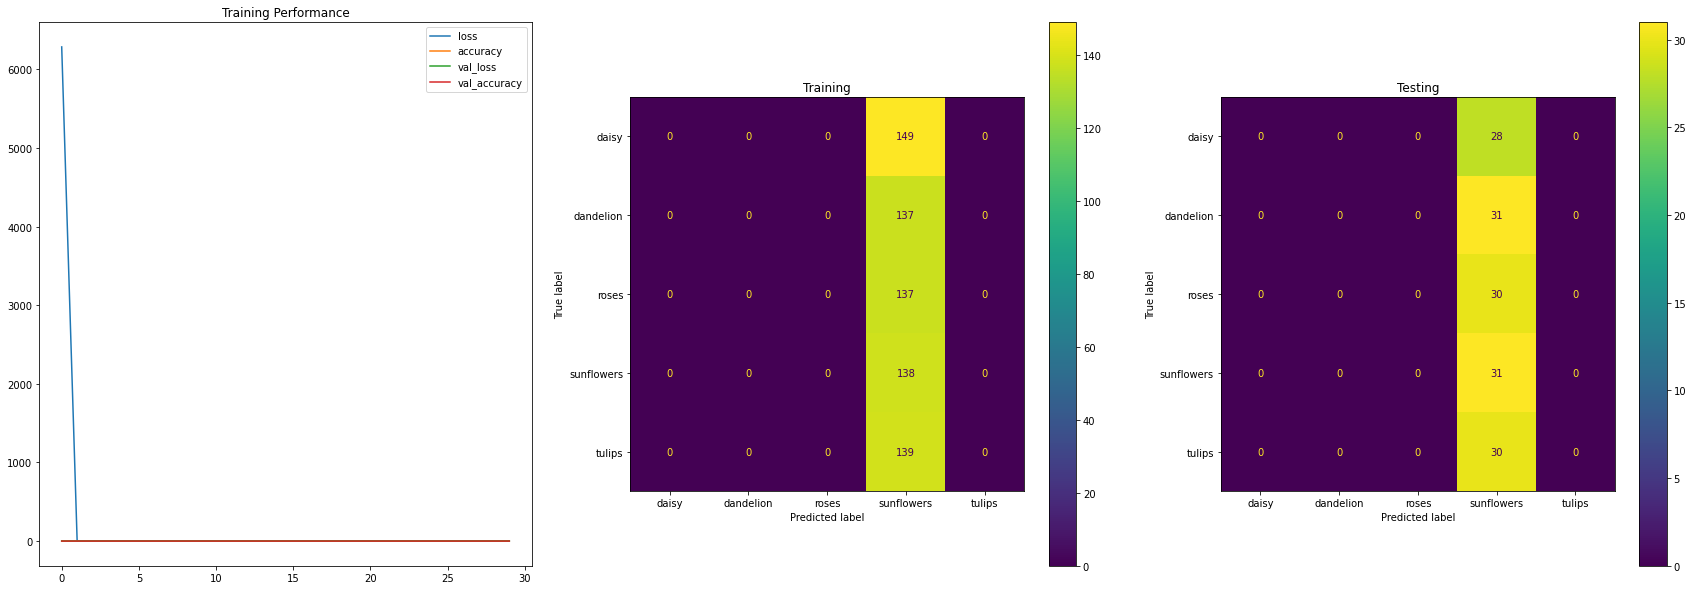

In [84]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights="imagenet",
    input_shape=(256,256,3),
    include_top = False 
)

outputs = layers.Flatten()(model.layers[-1].output)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(5, activation='softmax')(outputs)

model_1 = keras.Model(inputs=model.input, outputs=outputs)

for layer in model_1.layers[:-6]:
    layer.trainable = False

model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(
                  learning_rate=1, momentum=0.0, nesterov=False
              ),
              metrics=['accuracy'])

history = model_1.fit(train_X, train_Y,
                        batch_size=64,
                        epochs=30,
                        validation_data=(validation_X, validation_Y))
eval_model(model_1, train_X, train_Y, test_X, test_Y)

    

In [35]:
for layer in model_0001.layers:
    print(layer.name, layer.trainable)


input_2 False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_depthwi

In [30]:
for layer in model_01.layers:
    print(layer.name, layer.trainable)

input_1 False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_depthwi

In [ ]:

for layer in model_1.layers:
    print(layer.name, layer.trainable)

### **Momentum Tests**

Epoch 1/30
22/22 [==============================] - 61s 790ms/step - loss: 2.8466 - accuracy: 0.2500 - val_loss: 1.6025 - val_accuracy: 0.2667
Epoch 2/30
22/22 [==============================] - 12s 555ms/step - loss: 1.3625 - accuracy: 0.4414 - val_loss: 1.9648 - val_accuracy: 0.1733
Epoch 3/30
22/22 [==============================] - 15s 712ms/step - loss: 0.8844 - accuracy: 0.6600 - val_loss: 1.5339 - val_accuracy: 0.3867
Epoch 4/30
22/22 [==============================] - 10s 440ms/step - loss: 0.6176 - accuracy: 0.7571 - val_loss: 2.0021 - val_accuracy: 0.2867
Epoch 5/30
22/22 [==============================] - 10s 444ms/step - loss: 0.2897 - accuracy: 0.9229 - val_loss: 1.6822 - val_accuracy: 0.4200
Epoch 6/30
22/22 [==============================] - 10s 454ms/step - loss: 0.1197 - accuracy: 0.9800 - val_loss: 2.1553 - val_accuracy: 0.4200
Epoch 7/30
22/22 [==============================] - 11s 498ms/step - loss: 0.0473 - accuracy: 0.9986 - val_loss: 2.0515 - val_accuracy: 0.3733

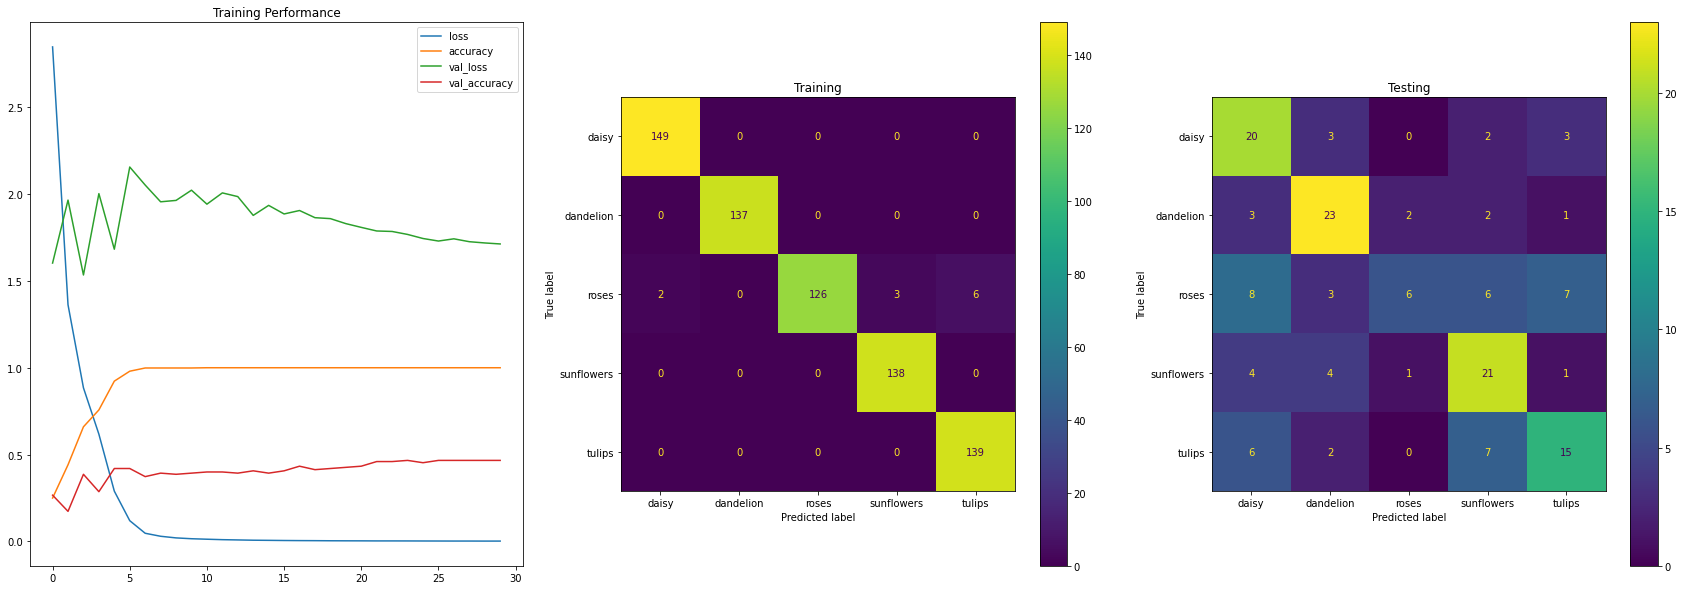

In [86]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights="imagenet",
    input_shape=image_size,
    include_top = False 
)

outputs = layers.GlobalAveragePooling2D()(model.layers[-1].output)
outputs = layers.Dense(256, activation='relu')(outputs)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(5, activation='softmax')(outputs)

model_mom_0001 = keras.Model(inputs=model.input, outputs=outputs)


for layer in model_mom_0001.layers[:-6]:
    layer.trainable = False
#model_mom_0001.summary()


model_mom_0001.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.SGD(
                  learning_rate=0.01, momentum=0.001, nesterov=False
              ),
              metrics=['accuracy'])

history = model_mom_0001.fit(train_X, train_Y,
                        batch_size=32,
                        epochs=30,
                        validation_data=(validation_X, validation_Y))
eval_model(model_mom_0001, train_X, train_Y, test_X, test_Y)

Epoch 1/30
22/22 [==============================] - 12s 481ms/step - loss: 4.0489 - accuracy: 0.2157 - val_loss: 1.5710 - val_accuracy: 0.2267
Epoch 2/30
22/22 [==============================] - 10s 449ms/step - loss: 1.4507 - accuracy: 0.3557 - val_loss: 1.5672 - val_accuracy: 0.2800
Epoch 3/30
22/22 [==============================] - 10s 464ms/step - loss: 1.2653 - accuracy: 0.4943 - val_loss: 2.2354 - val_accuracy: 0.1600
Epoch 4/30
22/22 [==============================] - 9s 430ms/step - loss: 0.8328 - accuracy: 0.7129 - val_loss: 1.7397 - val_accuracy: 0.3067
Epoch 5/30
22/22 [==============================] - 10s 440ms/step - loss: 0.5105 - accuracy: 0.8300 - val_loss: 2.6053 - val_accuracy: 0.2600
Epoch 6/30
22/22 [==============================] - 10s 465ms/step - loss: 0.2473 - accuracy: 0.9286 - val_loss: 1.5368 - val_accuracy: 0.4533
Epoch 7/30
22/22 [==============================] - 10s 465ms/step - loss: 0.1025 - accuracy: 0.9843 - val_loss: 1.7133 - val_accuracy: 0.3867


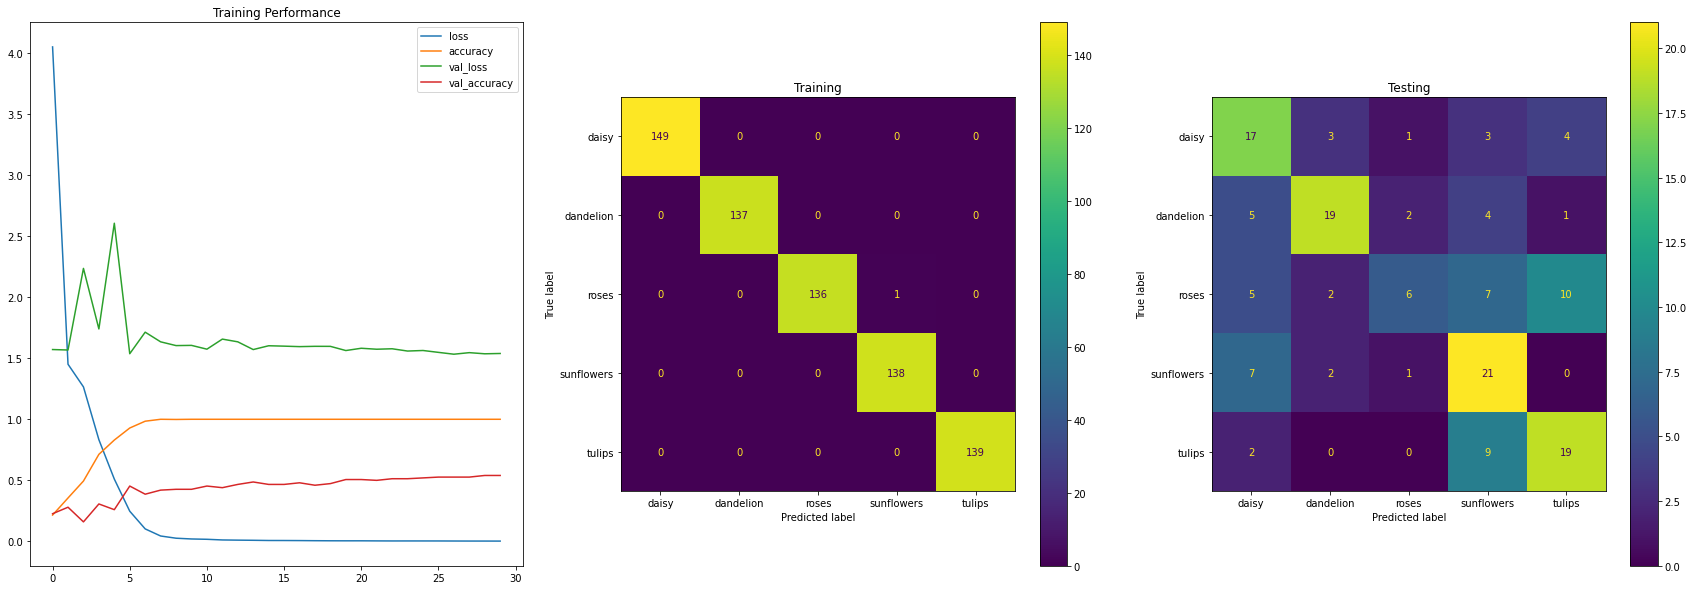

In [87]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights="imagenet",
    input_shape=image_size,
    include_top = False 
)

outputs = layers.GlobalAveragePooling2D()(model.layers[-1].output)
outputs = layers.Dense(256, activation='relu')(outputs)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(5, activation='softmax')(outputs)


model_mom_001 = keras.Model(inputs=model.input, outputs=outputs)
#model_mom_01.summary()


for layer in model_mom_001.layers[:-6]:
    layer.trainable = False

model_mom_001.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.SGD(
                  learning_rate=0.01, momentum=0.01, nesterov=False
              ),
              metrics=['accuracy'])

history = model_mom_001.fit(train_X, train_Y,
                        batch_size=32,
                        epochs=30,
                        validation_data=(validation_X, validation_Y))
eval_model(model_mom_001, train_X, train_Y, test_X, test_Y)

Epoch 1/30
22/22 [==============================] - 12s 476ms/step - loss: 2.5854 - accuracy: 0.2557 - val_loss: 1.5899 - val_accuracy: 0.2400
Epoch 2/30
22/22 [==============================] - 10s 447ms/step - loss: 1.5174 - accuracy: 0.3129 - val_loss: 1.5935 - val_accuracy: 0.2267
Epoch 3/30
22/22 [==============================] - 9s 403ms/step - loss: 1.3291 - accuracy: 0.4371 - val_loss: 1.5573 - val_accuracy: 0.3200
Epoch 4/30
22/22 [==============================] - 9s 394ms/step - loss: 0.9788 - accuracy: 0.6243 - val_loss: 1.3247 - val_accuracy: 0.4267
Epoch 5/30
22/22 [==============================] - 10s 440ms/step - loss: 0.5790 - accuracy: 0.7857 - val_loss: 1.7229 - val_accuracy: 0.4000
Epoch 6/30
22/22 [==============================] - 11s 506ms/step - loss: 0.2968 - accuracy: 0.9071 - val_loss: 1.7042 - val_accuracy: 0.4000
Epoch 7/30
22/22 [==============================] - 14s 629ms/step - loss: 0.1280 - accuracy: 0.9643 - val_loss: 1.5959 - val_accuracy: 0.4533
E

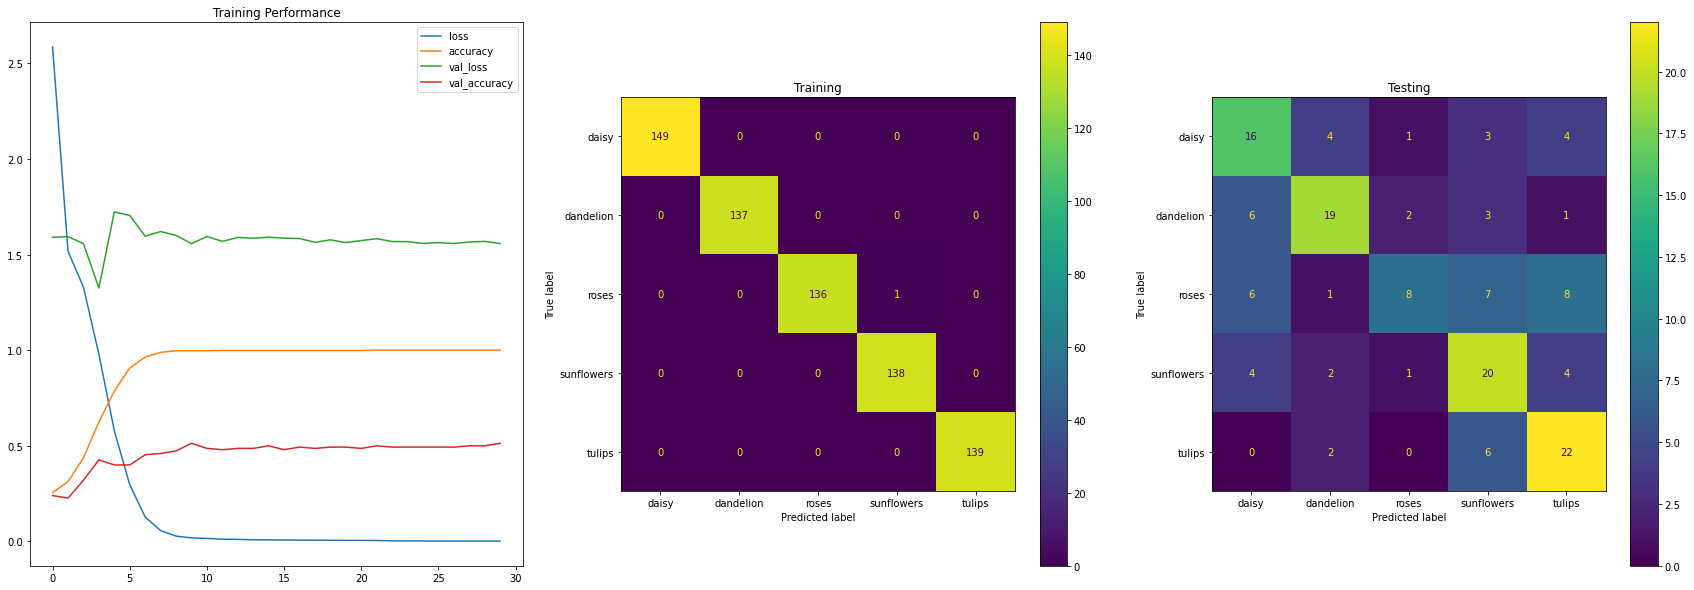

In [88]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights="imagenet",
    input_shape=image_size,
    include_top = False 
)

outputs = layers.GlobalAveragePooling2D()(model.layers[-1].output)
outputs = layers.Dense(256, activation='relu')(outputs)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(5, activation='softmax')(outputs)


model_mom_01 = keras.Model(inputs=model.input, outputs=outputs)
#model_mom_1.summary()


for layer in model_mom_01.layers[:-6]:
    layer.trainable = False

model_mom_01.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.SGD(
                  learning_rate=0.01, momentum=0.1, nesterov=False
              ),
              metrics=['accuracy'])

history = model_mom_01.fit(train_X, train_Y,
                        batch_size=32,
                        epochs=30,
                        validation_data=(validation_X, validation_Y))
eval_model(model_mom_01, train_X, train_Y, test_X, test_Y)

In [130]:
for layer in model_mom_001.layers:
    print(layer.name, layer.trainable)

input_4 False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_depthwi

In [ ]:
def test(data):
    batch_size = 32
    img_height = 180
    img_width = 180
    train_ds = tf.keras.utils.image_dataset_from_directory(
        "Data",
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)
    val_ds = tf.keras.utils.image_dataset_from_directory(
        "Data",
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)
    class_names = train_ds.class_names
    print(class_names)
    for image_batch, labels_batch in train_ds:
        print(image_batch.shape)
        print(labels_batch.shape)
        break
    normalization_layer = tf.keras.layers.Rescaling(1./255)
    normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
    image_batch, labels_batch = next(iter(normalized_ds))
    first_image = image_batch[0]
    # Notice the pixel values are now in `[0,1]`.
    print(np.min(first_image), np.max(first_image))

    AUTOTUNE = tf.data.AUTOTUNE

    train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

    num_classes = 5

    model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
    ])
    model.compile(
        optimizer='adam',
        loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

    model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=10
        )

In [ ]:
def test(data):
    model = tf.keras.applications.mobilenet_v2.MobileNetV2(
        weights="imagenet",
        input_shape=image_size,
        include_top = False 
    )
    print(model.summary())
    # print(data["test_X"])
    data["train_X"] = model.predict(data["train_X"]);
    data["validation_X"] = model.predict(data["validation_X"]);
    data["test_X"] = model.predict(data["test_X"]);
    # print(test_X)

    model2 = tf.keras.Sequential([
        # layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (7, 7, 1280)),
        layers.GlobalAveragePooling2D(input_shape = (7, 7, 1280)),
        layers.Dense(256, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(5, activation='softmax')
        ])

    # inputs = layers.Input(shape=(7, 7, 1280))
    # x1 = layers.GlobalAveragePooling2D()(inputs)
    # x2 = layers.Dense(256, activation='relu')(x1)
    # x3 = layers.Dense(64, activation='relu')(x2)
    # outputs = layers.Dense(5, activation='softmax')(x3)
    # model2 = Model(inputs=inputs, outputs=outputs)

    print(model2.summary())
    compile_fit_eval(data, model2, batch_size, epochs, 0.01, 0)
